<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Lab%203/Airline_Passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding 1	

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

The Dataset we picked contains data from  USA airline passenger satisfaction surveys. The data was collected in an effort for airlines to better understand their passengers. Using various questions about their travel, a Clustering Analysis that clusters passengers into satisfied and not satisfied can be built. 

We will measure the effectiveness of the model by evaluating Accuarcy, Precision, and Recall on the Test data.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import statistics
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Understanding 1	

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?


In [4]:
# read the files into a dataframe
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')


# verify the dataframe loaded
print(train.shape)
print(train.head())

print('\n')
print(test.shape)
print(test.head())

(103904, 25)
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2   

| Field                             | Description                                                  | Dtype    |
| --------------------------------- | ------------------------------------------------------------ | -------- |
| Gender                            | Gender of the passengers (Female, Male)                      | object   |
| Customer Type                     | The customer type (Loyal customer, disloyal customer)        | object   |
| Age                               | The actual age of the passengers                             | int64    |
| Type of Travel                    | Purpose of the flight of the passengers (Personal Travel, Business Travel) | object   |
| Class                             | Travel class in the plane of the passengers (Business, Eco, Eco Plus) | object   |
| Flight distance                   | The flight distance of this journey                          | int64    |
| Inflight wifi service             | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) | int64    |
| Departure/Arrival time convenient | Satisfaction level of Departure/Arrival time convenient     | int64    |
| Ease of Online booking            | Satisfaction level of online booking                        | int64    |
| Gate location                     | Satisfaction level of Gate location                          | int64    |
| Food and drink                    | Satisfaction level of Food and drink                         | int64    |
| Online boarding                   | Satisfaction level of online boarding                        | int64    |
| Seat comfort                      | Satisfaction level of Seat comfort                           | int64    |
| Inflight entertainment            | Satisfaction level of inflight entertainment                 | int64    |
| On-board service                  | Satisfaction level of On-board service                       | int64    |
| Leg room service                  | Satisfaction level of Leg room service                       | int64    |
| Baggage handling                  | Satisfaction level of baggage handling                       | int64    |
| Check-in service                  | Satisfaction level of Check-in service                       | int64    |
| Inflight service                  | Satisfaction level of inflight service                       | int64    |
| Cleanliness                       | Satisfaction level of Cleanliness                            | int64    |
| Departure Delay in Minutes        | Minutes delayed when departure                               | int64    |
| Arrival Delay in Minutes          | Minutes delayed when Arrival                                 | float64  |
| Satisfaction                      | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) | object   |


All of the satisfaction level fields are ranked between 0-5. 

In [5]:
# Delete unnecessary row
train.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

# check
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [26]:
frames = [train,test]

result = pd.concat(frames)

In [27]:
print(result.info())

result.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129797.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.055086
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.426749
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [28]:
result.isnull().sum()


Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [30]:
print('Mean: ', result['Arrival Delay in Minutes'].mean())
print('Median: ', result['Arrival Delay in Minutes'].median())
print('Mode: ', statistics.mode(result['Arrival Delay in Minutes']))

Mean:  15.055086018937264
Median:  0.0
Mode:  0.0


There are 310 missing values in the Arrival Delay in Minutes column. We can either impute the mean or make them 0 or delete these observations. Seeing as how the Mode and the Median are both 0, we will impute them as 0.

In [31]:
# make missing values 0
result = result.fillna(0)
# check missing values again
result.isnull().sum()


Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Data Understanding 2	

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.


In [32]:
num_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
               'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
               'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
               'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']



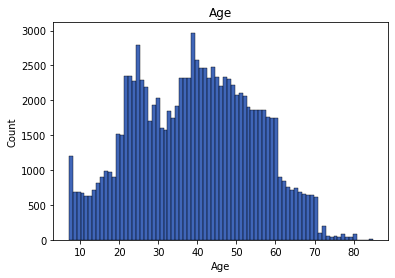

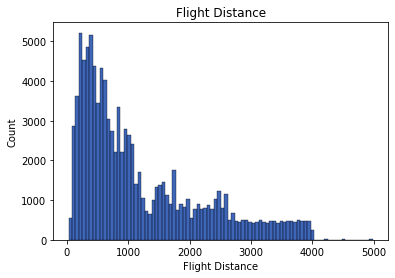

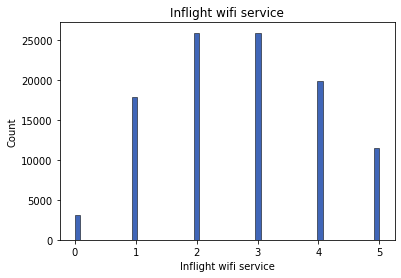

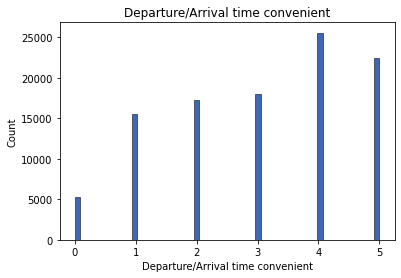

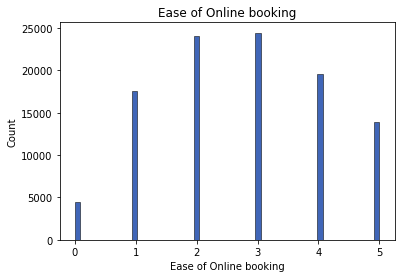

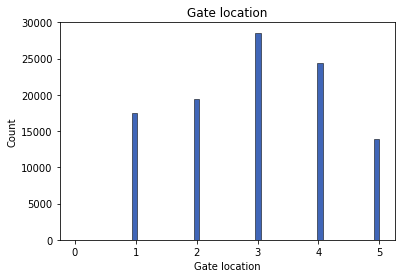

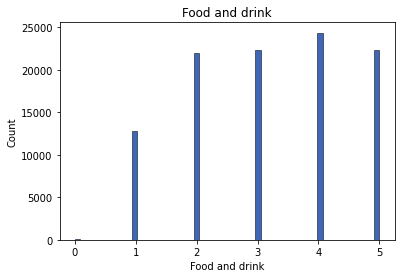

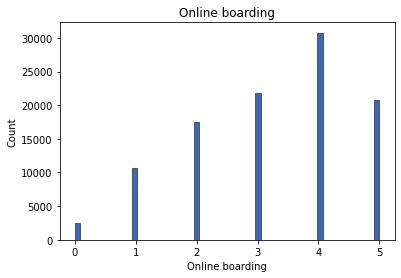

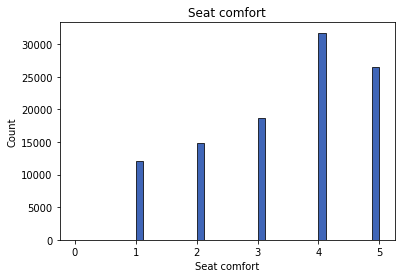

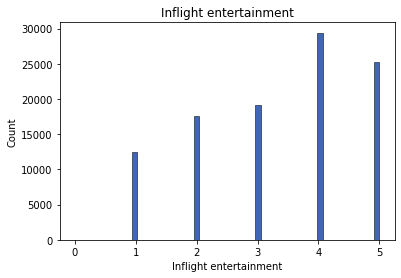

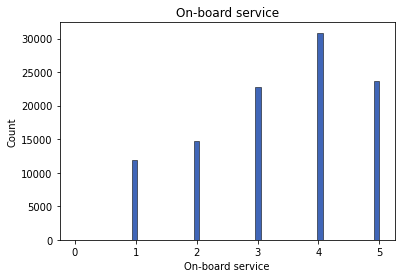

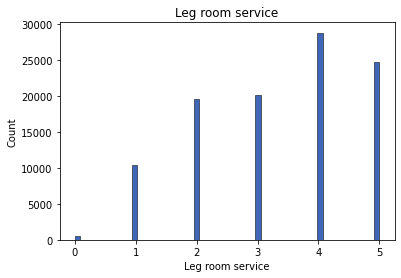

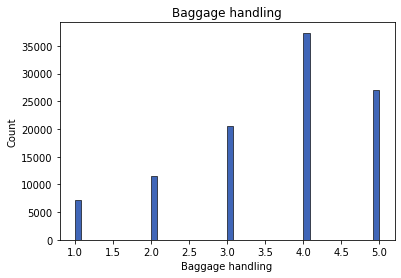

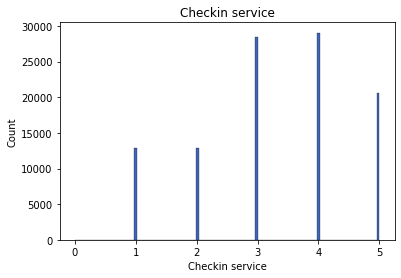

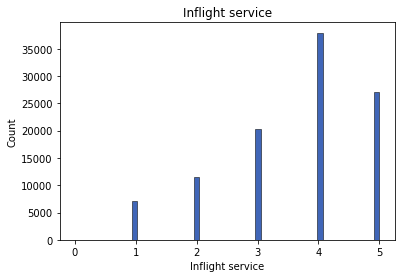

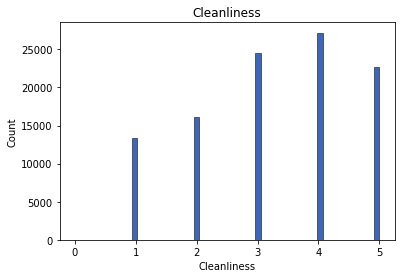

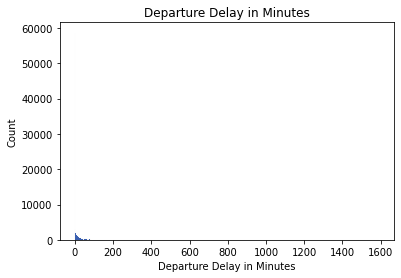

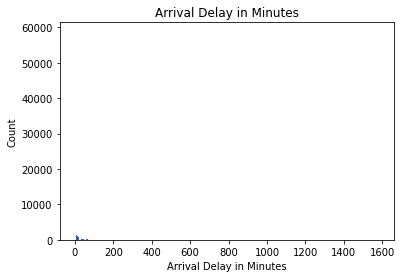

In [33]:
for col in num_columns:
    sns.histplot(train[col])
    plt.title(col)
    plt.show();

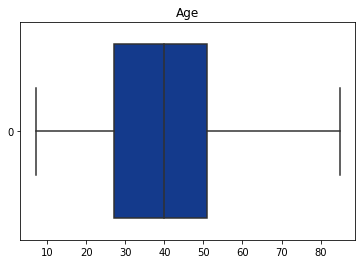

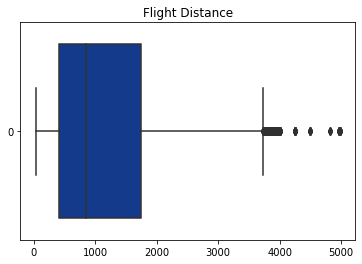

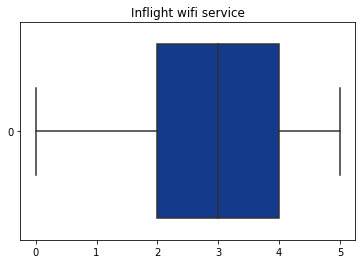

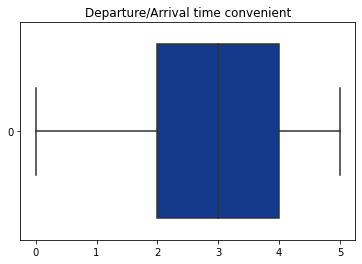

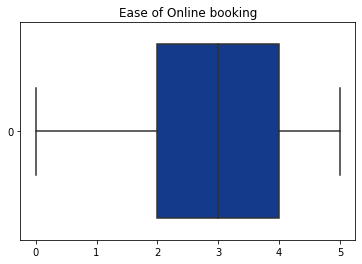

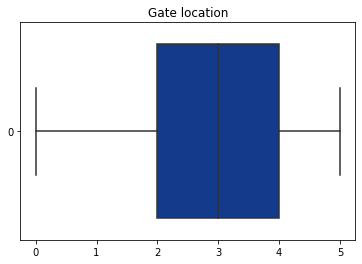

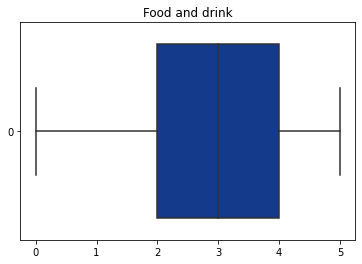

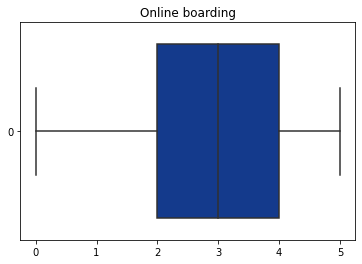

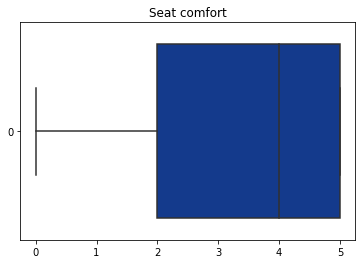

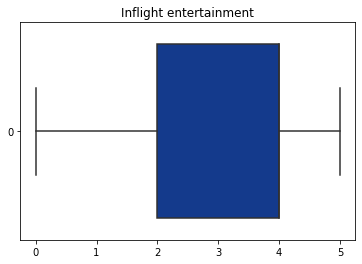

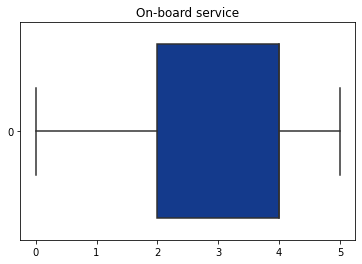

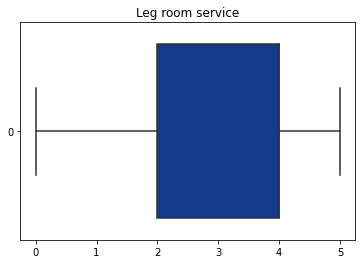

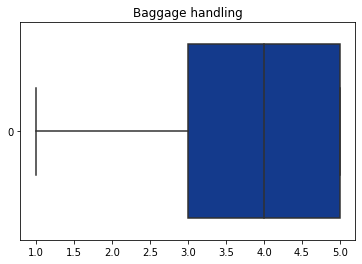

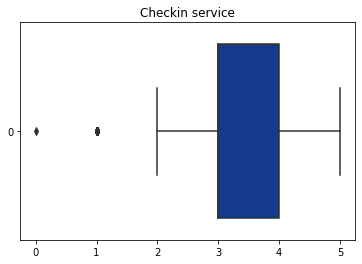

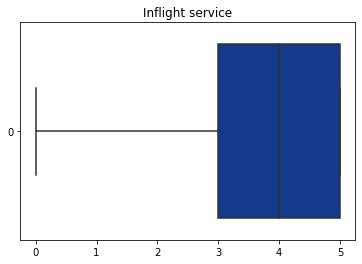

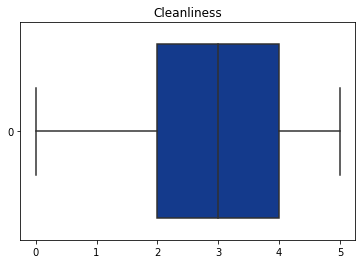

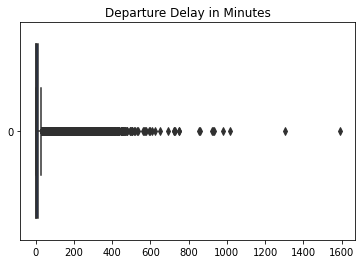

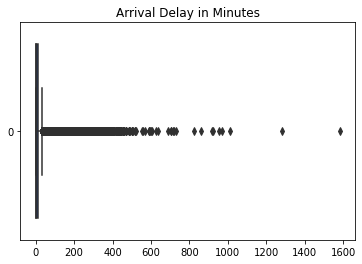

In [34]:
for col in num_columns:
    sns.boxplot(train[col], orient = 'horizontal')
    plt.title(col)
    plt.show();

In [35]:
# Utilized https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146

# SMU Colors
my_colors = ['#0033A0', '#C8102E']
sns.set_palette(sns.color_palette(my_colors))


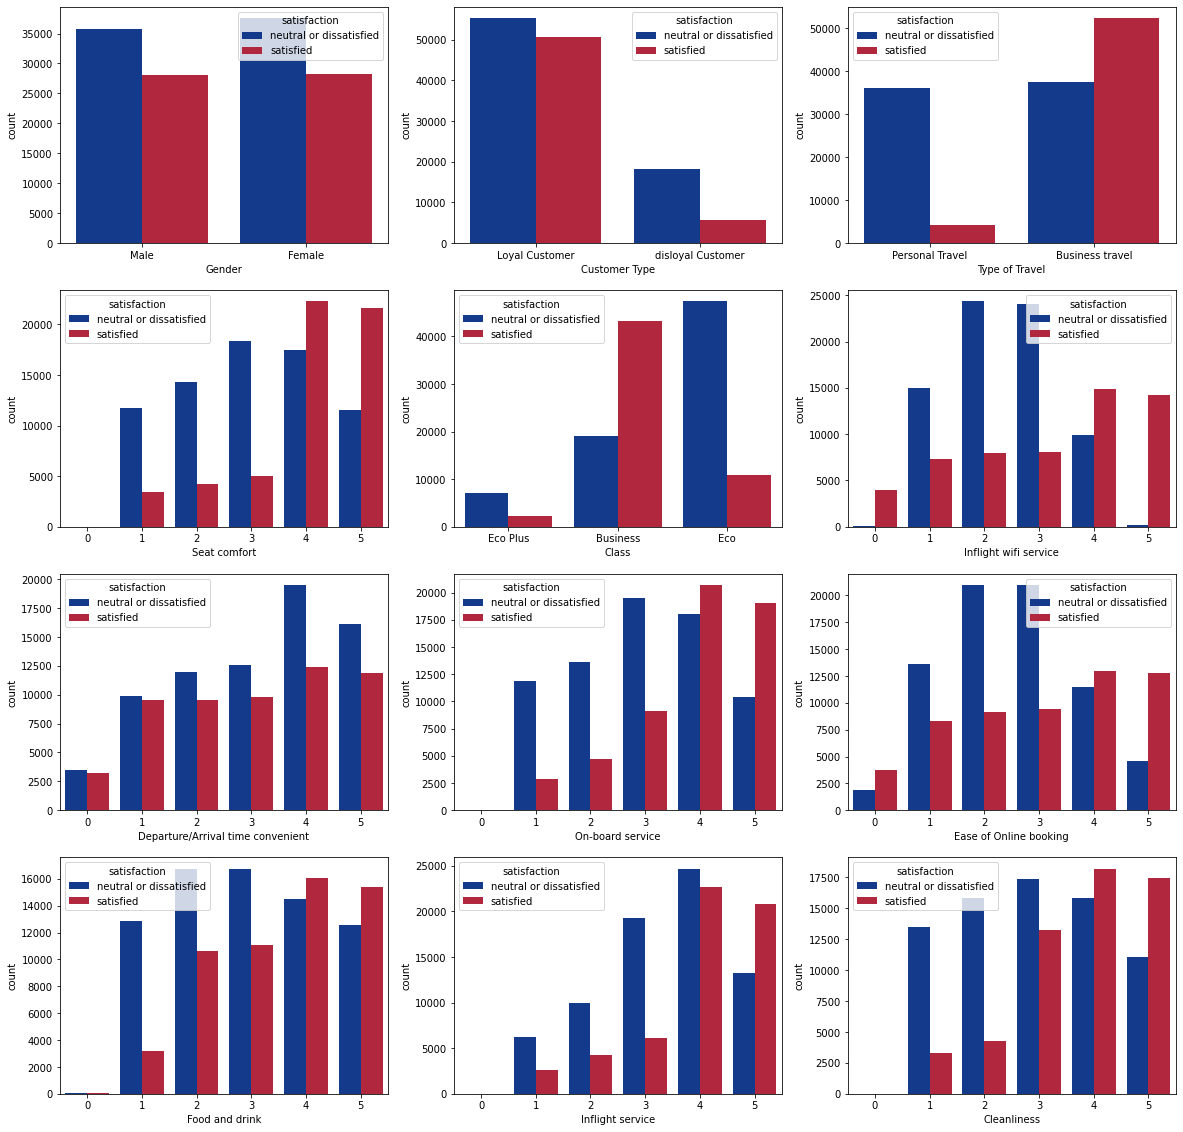

In [36]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))

sns.countplot(x = 'Gender', data = result, hue = 'satisfaction', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = result, hue = 'satisfaction', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = result, hue = 'satisfaction', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = result, hue = 'satisfaction', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = result, hue = 'satisfaction', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = result, hue = 'satisfaction', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = result, hue = 'satisfaction', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = result, hue = 'satisfaction', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = result, hue = 'satisfaction', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = result, hue = 'satisfaction', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = result, hue = 'satisfaction', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = result, hue = 'satisfaction', ax = axes[3, 2]);


## NEED INTERPRETATIONS OF PLOTS ABOVE

# Modeling and Evaluation 1	

In [37]:
# if we want dummy variables
result_dummies = pd.get_dummies(result)
result_dummies

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1,1,0,0,1,0,0,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,1,0,1,1,0,1,0,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,1,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,0,1,0
4,61,214,3,3,3,3,4,5,5,3,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,1,0,1,1,0,1,0,0,1,0
25972,23,646,4,4,4,4,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1
25973,17,828,2,5,1,5,2,1,2,2,...,0,1,0,0,1,0,1,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1


In [47]:
X_all = result_dummies.drop('satisfaction_satisfied', 
                            axis = 1)

X_all = X_all.drop('satisfaction_neutral or dissatisfied', 
                   axis = 1)

y_all = result['satisfaction']

In [39]:
X, X_test, y, y_test = train_test_split(X_all, 
                                        y_all, 
                                        test_size = 0.2, 
                                        random_state = 42)
X.shape, X_test.shape

((103904, 27), (25976, 27))

Gini Decision Tree

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model_gini = DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best',
    random_state = 42,
    max_depth = 10
)

model_gini.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [41]:
y_predictions_gini = model_gini.predict(X_test)
print(y_predictions_gini)

['neutral or dissatisfied' 'satisfied' 'satisfied' ... 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied']


In [42]:
results_gini = pd.DataFrame()
results_gini['Actual'] = y_test
results_gini['Prediction'] = y_predictions_gini
results_gini['Correct'] = results_gini['Actual'] == results_gini['Prediction']
results_gini = results_gini.reset_index().drop('index', axis = 1)
results_gini

,Actual,Prediction,Correct
0,neutral or dissatisfied,neutral or dissatisfied,True
1,satisfied,satisfied,True
2,neutral or dissatisfied,satisfied,False
3,satisfied,neutral or dissatisfied,False
4,satisfied,neutral or dissatisfied,False
...,...,...,...
25971,neutral or dissatisfied,satisfied,False
25972,neutral or dissatisfied,neutral or dissatisfied,True
25973,satisfied,satisfied,True
25974,neutral or dissatisfied,neutral or dissatisfied,True


In [45]:
print('Accuracy: ', accuracy_score(y_test, y_predictions_gini), 
      '\n \n', 
      'Classification Report: \n')

print(classification_report(y_test, 
                            y_predictions_gini, 
                            digits = 5))


Accuracy:  0.9476439790575916 
 
 Classification Report: 

                         precision    recall  f1-score   support

neutral or dissatisfied    0.94097   0.96793   0.95426     14657
              satisfied    0.95688   0.92137   0.93879     11319

               accuracy                        0.94764     25976
              macro avg    0.94892   0.94465   0.94652     25976
           weighted avg    0.94790   0.94764   0.94752     25976



Entropy Decision Tree

In [52]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model_gini = DecisionTreeClassifier(
    criterion = 'entropy',
    splitter = 'best',
    random_state = 42,
    max_depth = 10
)

model_gini.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [53]:
y_predictions_gini = model_gini.predict(X_test)
print(y_predictions_gini)

['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'satisfied' 'neutral or dissatisfied' 'neutral or dissatisfied']


In [54]:
results_gini = pd.DataFrame()
results_gini['Actual'] = y_test
results_gini['Prediction'] = y_predictions_gini
results_gini['Correct'] = results_gini['Actual'] == results_gini['Prediction']
results_gini = results_gini.reset_index().drop('index', axis = 1)
results_gini

,Actual,Prediction,Correct
0,neutral or dissatisfied,neutral or dissatisfied,True
1,satisfied,satisfied,True
2,neutral or dissatisfied,neutral or dissatisfied,True
3,satisfied,satisfied,True
4,satisfied,neutral or dissatisfied,False
...,...,...,...
25971,neutral or dissatisfied,satisfied,False
25972,neutral or dissatisfied,neutral or dissatisfied,True
25973,satisfied,satisfied,True
25974,neutral or dissatisfied,neutral or dissatisfied,True


In [55]:
print('Accuracy: ', accuracy_score(y_test, y_predictions_gini), 
      '\n \n', 
      'Classification Report: \n')

print(classification_report(y_test, 
                            y_predictions_gini, 
                            digits = 5))


Accuracy:  0.9473360024638128 
 
 Classification Report: 

                         precision    recall  f1-score   support

neutral or dissatisfied    0.93745   0.97148   0.95416     14657
              satisfied    0.96125   0.91607   0.93812     11319

               accuracy                        0.94734     25976
              macro avg    0.94935   0.94378   0.94614     25976
           weighted avg    0.94782   0.94734   0.94717     25976



Kmeans Clustering

Followed this website:

https://realpython.com/k-means-clustering-python/

In [58]:
kmeans = KMeans(
  init = 'random',
  n_clusters = 3,
  n_init = 10,
  max_iter = 300,
  random_state = 42
)

In [59]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_all)

In [60]:
scaled_features

array([[-1.74796145, -0.73218446,  0.20409022, ..., -0.95806953,
        -0.90260816,  3.57783053],
       [-0.954274  , -0.95775999,  0.20409022, ...,  1.04376558,
        -0.90260816, -0.27949898],
       [-0.88813338, -0.04843998, -0.54816559, ...,  1.04376558,
        -0.90260816, -0.27949898],
       ...,
       [-1.48339897, -0.36324316, -0.54816559, ..., -0.95806953,
         1.10790047, -0.27949898],
       [-1.68182083, -0.06347835,  0.20409022, ...,  1.04376558,
        -0.90260816, -0.27949898],
       [ 0.17011655, -0.92868581, -0.54816559, ..., -0.95806953,
         1.10790047, -0.27949898]])

In [61]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [62]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

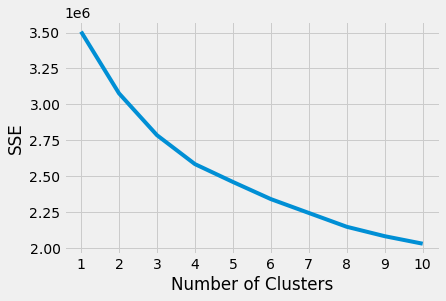

In [64]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [68]:
!pip install kneed


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve = 'convex', direction = 'decreasing')

kl.elbow

4